# Food Delivery Analysis
## Table of Contents:
1. Introduction
2. Load the data
3. Checking column names, data type and size
4. Data Analysis
    - Question 1 - What was the sum of sales, delivery fee, service fee and tip per month
    - Question 2 - Which delivery area had the highest number of orders?
    - Question 3 - What are the 5 restaurants that received the highest number of orders, and what are their locations?
    - Question 4 - During which hours do the restaurants receive the highest number of orders?
    - Question 5 - What are the busiest hours for each Delivery Area?
    - Question 6 - Which 10 drivers made the most deliveries?
    - Question 7 - At what time do we have the highest number of drivers making deliveries?
    - Question 8 - Are ASAP deliveries faster?
5. Conclusion

## 1. Introduction
In this project, I explore a Food Delivery dataset. The initial steps involve loading the data and checking some characteristics of the dataset, such as column names, data types, data size, and the presence of null values to understand the dataset's possibilities. Following this, we analyze various aspects of the data to uncover insights and address some questions that might arise.

## 2. Load the data

In [6]:
import pandas as pd
import numpy as np

In [205]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ricar\Documents\Data Science Studies\PYTHON\14. Food Delivery Analysis\data\Food-Delivery.csv")
df.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
0,1/1/2020,2:52:12,3:00:25,3:08:09,3:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2.0,1.40,0.0
1,1/1/2020,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2.0,11.03,0.0
2,1/1/2020,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,21.97,2.74,2.39,8.0,4.31,0.0
3,1/1/2020,4:01:57,4:08:18,4:13:02,4:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,32.79,0.12,2.55,2.0,8.55,0.0
4,1/1/2020,23:46:38,23:49:32,23:54:29,0:37:15,9187,Lauren,7385,1051183,Hayward,Yes,67.56,3.77,3.35,2.0,8.82,0.0


## 3. Understanding the dataset 

#### Checking column names, data type and and size
Checking for null values helps verify the completeness of your dataset.

In [206]:
# Get the Non-null count, data type, and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72314 entries, 0 to 72313
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               72314 non-null  object 
 1   Time customer placed order         72314 non-null  object 
 2   Time order placed at restaurant    72154 non-null  object 
 3   Time driver arrived at restaurant  54190 non-null  object 
 4   Delivery time                      72314 non-null  object 
 5   Driver ID                          72314 non-null  int64  
 6   Driver Name                        72314 non-null  object 
 7   Restaurant ID                      72314 non-null  int64  
 8   Customer ID                        72314 non-null  int64  
 9   Delivery Area                      72314 non-null  object 
 10  ASAP                               72314 non-null  object 
 11  Sub Total                          72314 non-null  flo

In [207]:
# Change the date type if necessary
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y')
df['Driver ID'] = df['Driver ID'].astype('object')
df['Restaurant ID'] = df['Restaurant ID'].astype('object')
df['Customer ID'] = df['Customer ID'].astype('object')

# Verify the change
df.dtypes

Date                                 datetime64[ns]
Time customer placed order                   object
Time order placed at restaurant              object
Time driver arrived at restaurant            object
Delivery time                                object
Driver ID                                    object
Driver Name                                  object
Restaurant ID                                object
Customer ID                                  object
Delivery Area                                object
ASAP                                         object
Sub Total                                   float64
Delivery fee                                float64
Service fee                                 float64
Discount                                    float64
Tip                                         float64
Refunded amount                             float64
dtype: object

In [208]:
# Get the sum of null values
df.isnull().sum()

Date                                     0
Time customer placed order               0
Time order placed at restaurant        160
Time driver arrived at restaurant    18124
Delivery time                            0
Driver ID                                0
Driver Name                              0
Restaurant ID                            0
Customer ID                              0
Delivery Area                            0
ASAP                                     0
Sub Total                                0
Delivery fee                             0
Service fee                              0
Discount                                 0
Tip                                      0
Refunded amount                          0
dtype: int64

In [209]:
# Get all the rows with null values
df[df.isnull().any(axis=1)]

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
8,2020-01-01,22:45:41,23:22:33,NaN,23:49:14,9034,Bethany,7286,1052229,Hayward,No,46.96,5.39,1.84,2.0,3.42,0.0
11,2020-01-01,4:58:55,4:59:31,NaN,5:24:01,9279,Ebony,7146,1179405,Hayward,Yes,53.30,4.73,1.98,2.0,8.17,0.0
13,2020-01-01,16:49:32,17:50:50,NaN,18:25:00,9383,Jennifer,7275,1067334,Union City,No,76.10,3.51,2.12,2.0,4.96,0.0
18,2020-01-01,19:21:54,19:25:02,NaN,20:32:06,9327,Janice,7262,1181283,Fremont,Yes,35.65,3.08,2.43,2.0,4.99,0.0
21,2020-01-01,2:32:46,2:36:38,NaN,3:30:03,9056,Joyce,7293,1125608,Union City,Yes,64.78,5.88,2.19,2.0,3.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72280,2020-04-30,4:15:54,4:23:15,NaN,5:09:03,9273,Heather,7037,1110162,Union City,Yes,130.13,7.80,5.82,2.0,21.00,0.0
72291,2020-04-30,8:49:52,9:07:54,NaN,10:05:57,9011,Mallory,7353,1006000,Hayward,Yes,191.89,7.97,2.92,2.0,32.11,0.0
72303,2020-04-30,3:55:11,3:57:17,NaN,4:56:21,9149,Wayne,7285,1006497,Hayward,Yes,99.55,3.47,3.28,2.0,5.15,0.0
72308,2020-04-30,6:55:28,7:41:24,NaN,9:15:27,9175,Elizabeth,7369,1172371,Hayward,Yes,91.15,3.41,1.95,2.0,5.94,0.0


In [200]:
# Count number of restaurants
count_restaurants = df['Restaurant ID'].nunique()
count_restaurants

408

In [210]:
# Identify delivery areas
count_deliveryarea = df['Delivery Area'].unique()
count_deliveryarea

array(['Fremont', 'Hayward', 'Union City'], dtype=object)

## 4. Data Analysis
This section focuses on addressing some questions that might arise after an initial view of the dataset.

### Question 1. What was the sum of sales, delivery fee, service fee, discount and tip per month?

In [211]:
# Include a month column
df['Month'] = df['Date'].dt.month
df.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Month
0,2020-01-01,2:52:12,3:00:25,3:08:09,3:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2.0,1.40,0.0,1
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2.0,11.03,0.0,1
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,21.97,2.74,2.39,8.0,4.31,0.0,1
3,2020-01-01,4:01:57,4:08:18,4:13:02,4:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,32.79,0.12,2.55,2.0,8.55,0.0,1
4,2020-01-01,23:46:38,23:49:32,23:54:29,0:37:15,9187,Lauren,7385,1051183,Hayward,Yes,67.56,3.77,3.35,2.0,8.82,0.0,1


In [212]:
# Get the numeric columns
df_float = df.select_dtypes(include=['int','float'])
# Group by month and reset index
sales_month = df_float.groupby('Month').sum().reset_index()

sales_month

,Month,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
0,1,1214041.05,72591.12,44946.44,60682.54,107950.21,10002.91
1,2,1663158.16,99438.64,61572.82,87368.00,147892.72,13704.19
2,3,1833191.17,109601.38,67866.49,59021.00,246155.70,22807.63
3,4,2075913.67,124117.10,76853.66,56782.00,184592.86,17105.27


In [213]:
import matplotlib.pyplot as plt

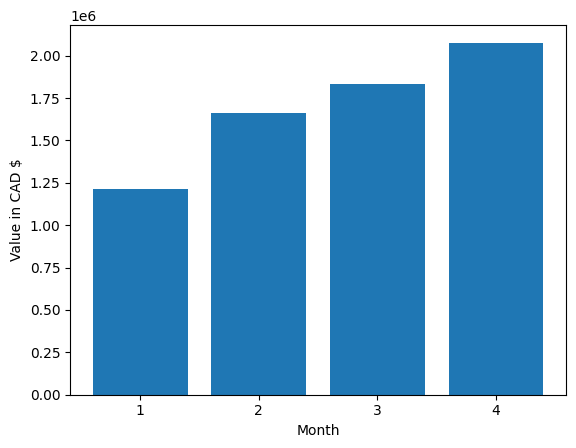

In [215]:
# Create a bar plot for revenue per month
plt.bar(sales_month['Month'], sales_month['Sub Total'])
plt.xticks(sales_month['Month'])
plt.ylabel('Value in CAD $')
plt.xlabel('Month')
plt.yscale('linear')

plt.show()

#### Include the initials of the months on the plot

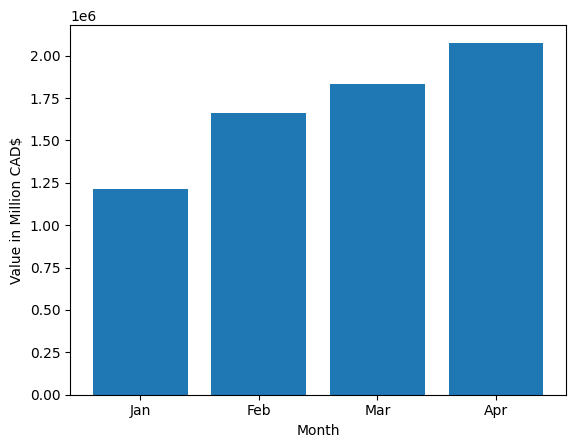

In [216]:
# import month names
import calendar

# Retrieve the first 3 letters from month - Jan to Apr
month_short = [name[:3] for name in calendar.month_name[1:5]]

# Replace month column with month_short in the plot
plt.bar(month_short, sales_month['Sub Total'])
plt.xticks(month_short)
plt.ylabel('Value in Million CAD$')
plt.xlabel('Month')
plt.yscale('linear')

plt.show()

### Question 2 - Which delivery area had the highest number of orders?

In [217]:
# Count values for each delivery area
region_orders = df['Delivery Area'].value_counts().reset_index()
region_orders

,Delivery Area,count
0,Fremont,24229
1,Hayward,24085
2,Union City,24000


### Question 3 - What are the 5 restaurants that received the highest number of orders, and what are their locations?

In [218]:
# Count values for each Restaurant ID
restaurant_orders = df['Restaurant ID'].value_counts().reset_index()

# Set column names and sort by Count of Orders
restaurant_orders.columns = ['Restaurant ID', 'Count of Orders']
restaurant_orders = restaurant_orders.sort_values(by='Count of Orders', ascending=False)

# Map Restaurant ID to Deliver Area in a dictionary
restaurant_area_map = dict(zip(df['Restaurant ID'], df['Delivery Area']))
restaurant_orders['Delivery area'] = restaurant_orders['Restaurant ID'].map(restaurant_area_map)

restaurant_orders.head(5)

,Restaurant ID,Count of Orders,Delivery area
0,7320,256,Hayward
1,7123,252,Union City
2,7213,244,Fremont
3,7113,244,Hayward
4,7247,240,Fremont


### Question 4 - During which hours do the restaurants receive the highest number of orders?

In [219]:
# Convert object type to datetime with format '%H:%M:%S'
df['Time customer placed order'] = pd.to_datetime(df['Time customer placed order'], format='%H:%M:%S')

# Create the hour column
df['Hour'] = df['Time customer placed order'].dt.hour

# Convert datetime back to only time
df['Time customer placed order'] = pd.to_datetime(df['Time customer placed order'], format='%H:%M:%S').dt.time

# Display the first 3 rows to verify the changes
df.head(2)

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Month,Hour
0,2020-01-01,02:52:12,3:00:25,3:08:09,3:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2.0,1.40,0.0,1,2
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2.0,11.03,0.0,1,15


In [220]:
# Count values for each hour
hour_count = df['Hour'].value_counts().sort_index().reset_index()

# Set column names
hour_count.columns = ['Hour', 'Count of Orders']
hour_count

,Hour,Count of Orders
0,0,10319
1,1,12353
2,2,11657
3,3,8533
4,4,5142
5,5,2921
6,6,2090
7,7,2202
8,8,1019
9,9,690


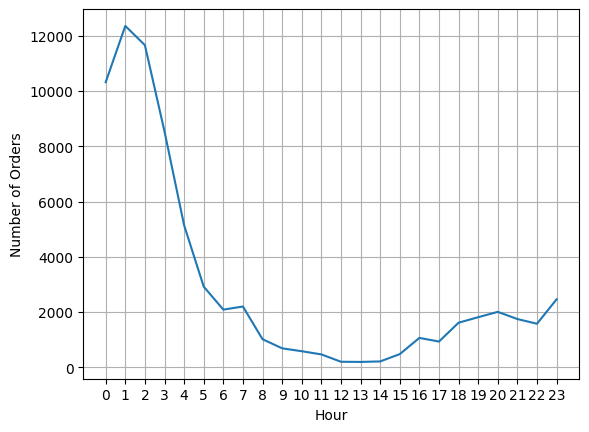

In [221]:
# Create a line plot
plt.plot(hour_count['Hour'], hour_count['Count of Orders'])
plt.xticks(hour_count['Hour'])
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

## Question 5 - What are the busiest hours for each Delivery Area?

In [222]:
# Group by area and hour - size() calculates the size (count) of each group
area_order = df.groupby(['Delivery Area', 'Hour']).size().reset_index(name='Count of Orders')
area_order

,Delivery Area,Hour,Count of Orders
0,Fremont,0,3481
1,Fremont,1,4103
2,Fremont,2,3941
3,Fremont,3,2900
4,Fremont,4,1704
...,...,...,...
67,Union City,19,579
68,Union City,20,672
69,Union City,21,572
70,Union City,22,534


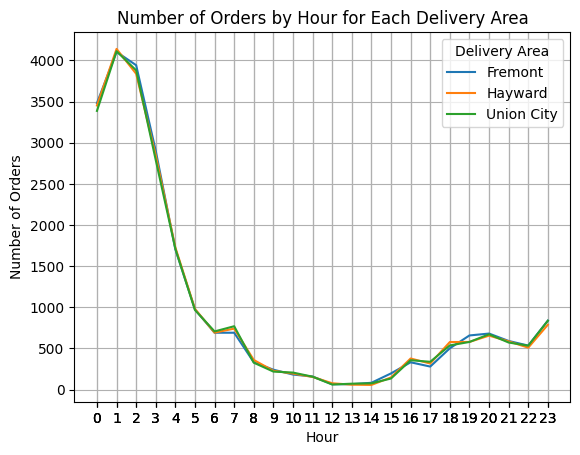

In [223]:
# Iterate over unique Delivery areas
for area in area_order['Delivery Area'].unique():
    # Filter data for the current delivery area
    area_data = area_order[area_order['Delivery Area'] == area]
    # Plot data for the current delivery area
    plt.plot(area_data['Hour'], area_data['Count of Orders'], label=area)

# Customize the plot
plt.xticks(area_order['Hour'])
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Area')
plt.title('Number of Orders by Hour for Each Delivery Area')
plt.grid()

plt.show()

## Question 6 - Which 10 drivers made most of the deliveries?

In [224]:
# Calculate driver orders and sort by count
driver_orders = df['Driver ID'].value_counts().reset_index()
driver_orders.columns = ['Driver ID', 'Count of Orders']
driver_orders = driver_orders.sort_values(by='Count of Orders', ascending=False)

# Map Driver Names to Driver IDs in a dictionary
driver_name_map = dict(zip(df['Driver ID'], df['Driver Name']))
driver_orders['Driver Name'] = driver_orders['Driver ID'].map(driver_name_map)

driver_orders.head(10)

,Driver ID,Count of Orders,Driver Name
0,9195,244,Doris
1,9308,244,Bailey
2,9237,240,Erin
3,9120,240,Chelsea
4,9128,240,Patricia
5,9046,240,Laura
6,9437,236,Bonnie
7,9264,232,Sheila
8,9273,228,Heather
9,9335,224,María


### Question 7 - At what time do we have the highest number of drivers making deliveries?

In [225]:
# How many Driver IDs
count_drivers = df['Driver ID'].nunique()
count_drivers

432

In [226]:
# Count the number of unique driver IDs per delivery hour
driver_time = df.groupby('Hour')['Driver ID'].nunique().reset_index(name='Count of Drivers')
driver_time.head(10)

,Hour,Count of Drivers
0,0,432
1,1,432
2,2,432
3,3,432
4,4,432
5,5,431
6,6,427
7,7,432
8,8,387
9,9,347


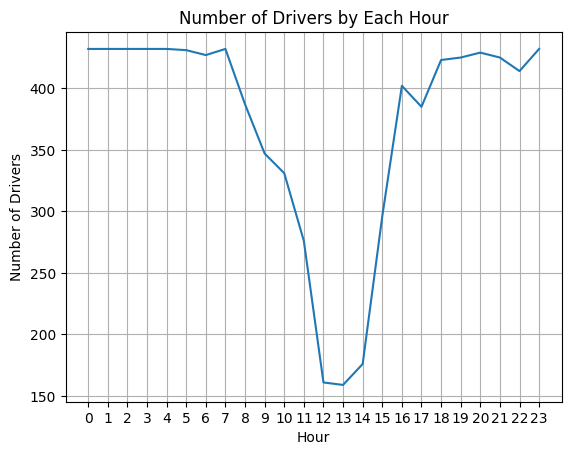

In [227]:
# Create a line plot
plt.plot(driver_time['Hour'], driver_time['Count of Drivers'])
plt.xticks(driver_time['Hour'])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Drivers')
plt.title('Number of Drivers by Each Hour')

plt.show()

### Plot the number of orders and drivers by each hour - side by side

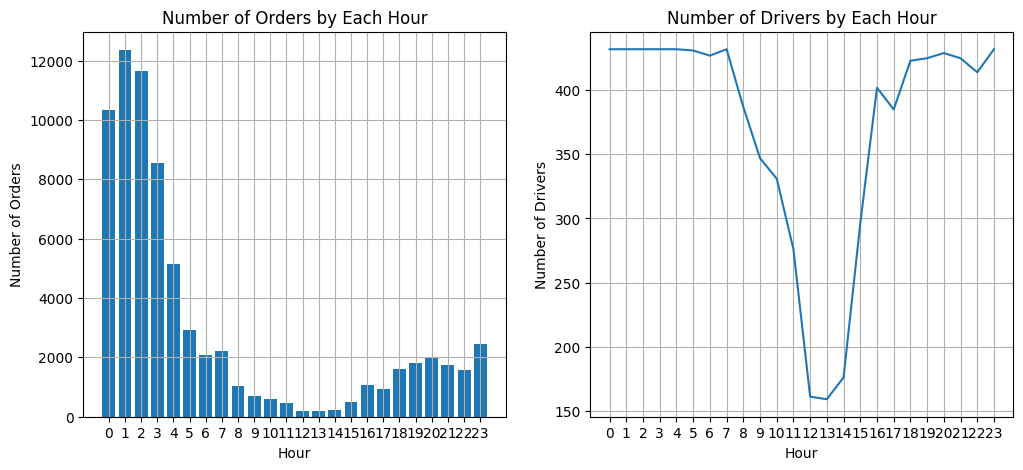

In [228]:
# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot (Number of Orders)
axs[0].bar(hour_count['Hour'], hour_count['Count of Orders'])
axs[0].set_xticks(hour_count['Hour'])
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Number of Orders')
axs[0].grid()
axs[0].set_title('Number of Orders by Each Hour')

# Second subplot (Number of Drivers)
axs[1].plot(driver_time['Hour'], driver_time['Count of Drivers'], label='Driver')
axs[1].set_xticks(driver_time['Hour'])
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Number of Drivers')
axs[1].grid()
axs[1].set_title('Number of Drivers by Each Hour')

# Show the plot
plt.show()

### Number of drivers and busiest hours in the same plot

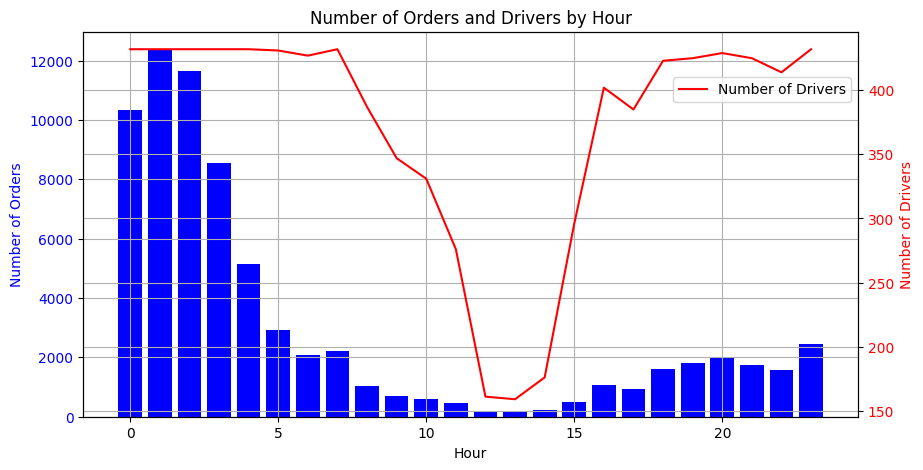

In [229]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting the number of orders on the primary y-axis
ax1.bar(hour_count['Hour'], hour_count['Count of Orders'], color='blue', label='Number of Orders')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Orders', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create a secondary y-axis for the number of drivers
ax2 = ax1.twinx()
ax2.plot(driver_time['Hour'], driver_time['Count of Drivers'], color='red', label='Number of Drivers')
ax2.set_ylabel('Number of Drivers', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show legends for both datasets
ax2.legend(loc='upper right',bbox_to_anchor=(1.0, 0.9))

# Title
plt.title('Number of Orders and Drivers by Hour')
plt.grid()

plt.show()

### Question 8 - Are ASAP deliveries faster?

- Create Time for Delivery column
- Subtract Delivery Time by Time customer placed order
- Add 24 hours to negative values

In [230]:
# Convert strings to datetime
df['Time customer placed order'] = pd.to_datetime(df['Time customer placed order'], format='%H:%M:%S')
df['Delivery time'] = pd.to_datetime(df['Delivery time'], format='%H:%M:%S')

# Calculate the time difference between Delivery time and Time customer placed order in minutes
df['Time for Delivery'] = (df['Delivery time'] - df['Time customer placed order']).dt.total_seconds()/60

# Add 24 hours to negative time differences (converted in minutes)
df.loc[df['Time for Delivery'] < 0, 'Time for Delivery'] += 24 * 60

df.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Month,Hour,Time for Delivery
0,2020-01-01,1900-01-01 02:52:12,3:00:25,3:08:09,1900-01-01 03:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2.0,1.40,0.0,1,2,43.133333
1,2020-01-01,1900-01-01 15:58:57,17:56:45,18:24:39,1900-01-01 18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2.0,11.03,0.0,1,15,178.066667
2,2020-01-01,1900-01-01 19:02:37,19:12:51,19:19:59,1900-01-01 19:31:09,9051,Janet,7293,1081871,Hayward,Yes,21.97,2.74,2.39,8.0,4.31,0.0,1,19,28.533333
3,2020-01-01,1900-01-01 04:01:57,4:08:18,4:13:02,1900-01-01 04:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,32.79,0.12,2.55,2.0,8.55,0.0,1,4,36.000000
4,2020-01-01,1900-01-01 23:46:38,23:49:32,23:54:29,1900-01-01 00:37:15,9187,Lauren,7385,1051183,Hayward,Yes,67.56,3.77,3.35,2.0,8.82,0.0,1,23,50.616667


#### Outlier presence:
Considering typical delivery times, I would say that deliveries taking longer than 4 hours suggest the presence of outliers. They can occur due to various reasons such as measurement errors, natural variation, or anomalies in the data.

In [231]:
# Filtering more than 3 hours for delivery
df[df['Time for Delivery'] > 240]

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Month,Hour,Time for Delivery
55,2020-01-01,1900-01-01 20:41:19,0:12:51,NaN,1900-01-01 00:49:00,9016,Angela,7090,1082338,Union City,No,61.77,0.96,3.12,8.0,9.68,0.0,1,20,247.683333
147,2020-01-01,1900-01-01 23:59:56,18:12:54,18:15:03,1900-01-01 18:42:18,9304,Linda,7091,1158520,Hayward,No,112.14,0.85,3.85,2.0,12.52,0.0,1,23,1122.366667
187,2020-01-01,1900-01-01 00:26:40,17:49:33,18:15:14,1900-01-01 18:38:11,9103,Mayra,7382,1186117,Fremont,No,178.68,3.29,3.93,2.0,29.34,0.0,1,0,1091.516667
345,2020-01-01,1900-01-01 20:29:12,0:01:35,0:19:29,1900-01-01 00:56:44,9148,Madeline,7339,1119071,Fremont,No,256.21,3.78,3.17,2.0,28.86,0.0,1,20,267.533333
449,2020-01-01,1900-01-01 05:20:44,23:33:33,NaN,1900-01-01 01:33:07,9143,Lindsey,7210,1189552,Union City,No,340.04,5.81,2.37,2.0,19.46,0.0,1,5,1212.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72263,2020-04-30,1900-01-01 14:26:34,16:52:27,0:46:15,1900-01-01 01:02:42,9213,Jean,7279,1055748,Union City,Yes,32.86,8.51,3.09,2.0,6.43,0.0,4,14,636.133333
72269,2020-04-30,1900-01-01 16:01:33,0:42:55,NaN,1900-01-01 01:57:00,9029,Kristin,7101,1070449,Hayward,Yes,56.07,5.09,4.49,2.0,2.54,0.0,4,16,595.450000
72270,2020-04-30,1900-01-01 16:07:07,16:30:53,0:30:35,1900-01-01 00:57:19,9254,Gregory,7401,1170225,Fremont,Yes,112.83,9.69,3.12,2.0,11.93,0.0,4,16,530.200000
72283,2020-04-30,1900-01-01 03:30:14,9:00:11,9:32:56,1900-01-01 10:03:06,9109,Abigail,7166,1008440,Fremont,Yes,181.16,3.34,2.18,2.0,30.18,0.0,4,3,392.866667


### Identifying outliers in the Time for Delivery column:
Create a boxplot: the boxes will provide information about the quartiles and potential outliers in the delivery time for both ASAP and non-ASAP orders.

<Axes: xlabel='ASAP', ylabel='Time for Delivery'>

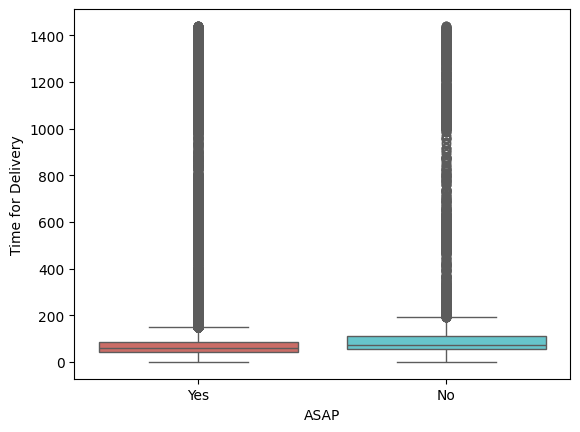

In [232]:
import seaborn as sb
# Create a boxplot
sb.boxplot(x='ASAP', y='Time for Delivery', hue='ASAP', data=df, palette='hls')

In [233]:
# Filter ASAP orders
asap_orders = df[df['ASAP']== 'Yes']

asap_orders['Time for Delivery'].describe()

count    57742.000000
mean       131.882118
std        255.013562
min          0.033333
25%         44.333333
50%         59.941667
75%         85.929167
max       1439.666667
Name: Time for Delivery, dtype: float64

- Q1 (First Quartile): The value below which 25% of the data falls.
- Q3 (Third Quartile): The value below which 75% of the data falls.
- IQR (Interquartile Range): The range between Q3 and Q1.

In [234]:
# Calculate quartiles for asap orders
Q1 = asap_orders['Time for Delivery'].quantile(0.25)
Q3 = asap_orders['Time for Delivery'].quantile(0.75)

# Calculate IQR for asap orders
IQR = Q3 - Q1

# Define lower and upper limits for asap orders
a_asap = Q1 - 1.5 * IQR
b_asap = Q3 + 1.5 * IQR

print('Lower ASAP outliers:', a_asap , ' and ', 'Upper ASAP outliers:', b_asap)

Lower ASAP outliers: -18.060416666666676  and  Upper ASAP outliers: 148.32291666666669


In [235]:
# Filter non-asap orders
non_asap_orders = df[df['ASAP']== 'No']

non_asap_orders['Time for Delivery'].describe()

count    14572.000000
mean       161.136375
std        278.523159
min          0.350000
25%         53.450000
50%         73.408333
75%        109.291667
max       1438.833333
Name: Time for Delivery, dtype: float64

In [236]:
# Calculate quartiles for non asap orders
Q1 = df_nonasap_filtered['Time for Delivery'].quantile(0.25)
Q3 = df_nonasap_filtered['Time for Delivery'].quantile(0.75)

# Calculate IQR for non asap orders
IQR = Q3 - Q1

# Define lower and upper limits for non asap orders
a_nonasap = Q1 - 1.5 * IQR
b_nonasap = Q3 + 1.5 * IQR

print('Lower Non-ASAP outliers:', a_nonasap , ' and ', 'Upper Non-ASAP outliers:', b_nonasap)

Lower Non-ASAP outliers: -30.312499999999986  and  Upper Non-ASAP outliers: 193.05416666666665


#### Filter the data to exclude the outliers

In [237]:
# Filtering outliers out
df_filtered = df[((df['ASAP'] == 'Yes') & (df['Time for Delivery'] < b_asap)) | ((df['ASAP'] == 'No') & (df['Time for Delivery'] < b_nonasap))]
df_filtered.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Month,Hour,Time for Delivery
0,2020-01-01,1900-01-01 02:52:12,3:00:25,3:08:09,1900-01-01 03:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2.0,1.40,0.0,1,2,43.133333
2,2020-01-01,1900-01-01 19:02:37,19:12:51,19:19:59,1900-01-01 19:31:09,9051,Janet,7293,1081871,Hayward,Yes,21.97,2.74,2.39,8.0,4.31,0.0,1,19,28.533333
3,2020-01-01,1900-01-01 04:01:57,4:08:18,4:13:02,1900-01-01 04:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,32.79,0.12,2.55,2.0,8.55,0.0,1,4,36.000000
4,2020-01-01,1900-01-01 23:46:38,23:49:32,23:54:29,1900-01-01 00:37:15,9187,Lauren,7385,1051183,Hayward,Yes,67.56,3.77,3.35,2.0,8.82,0.0,1,23,50.616667
5,2020-01-01,1900-01-01 03:54:30,3:57:30,4:10:26,1900-01-01 04:41:00,9203,Chloe,7064,1129838,Hayward,Yes,21.18,6.78,3.79,8.0,1.59,0.0,1,3,46.500000


In [161]:
# Filtered asap orders - without outliers
asap_orders_filtered = df_filtered[df_filtered['ASAP'] == 'Yes']

# Filtered non asap orders - without outliers
non_asap_orders_filtered = df_filtered[df_filtered['ASAP'] == 'No']

#### Average delivery time for ASAP deliveries:

In [157]:
average_time_asap = asap_orders_filtered['Time for Delivery'].mean()
average_time_asap

61.7594456439321

#### Average delivery time for Non-ASAP deliveries:

In [150]:
average_time_nonasap = non_asap_orders_filtered['Time for Delivery'].mean()
average_time_nonasap

75.44205112219451

In [153]:
# Check if the difference is lower for ASAP orders
if average_time_asap < average_time_nonasap:
    print("The Time for Delivery is lower for ASAP orders.")
else:
    print("The Time for Delivery is not lower for ASAP orders.")

The Time for Delivery is lower for ASAP orders.


#### Comparison between ASAP and Non-ASAP orders in a Histogram:

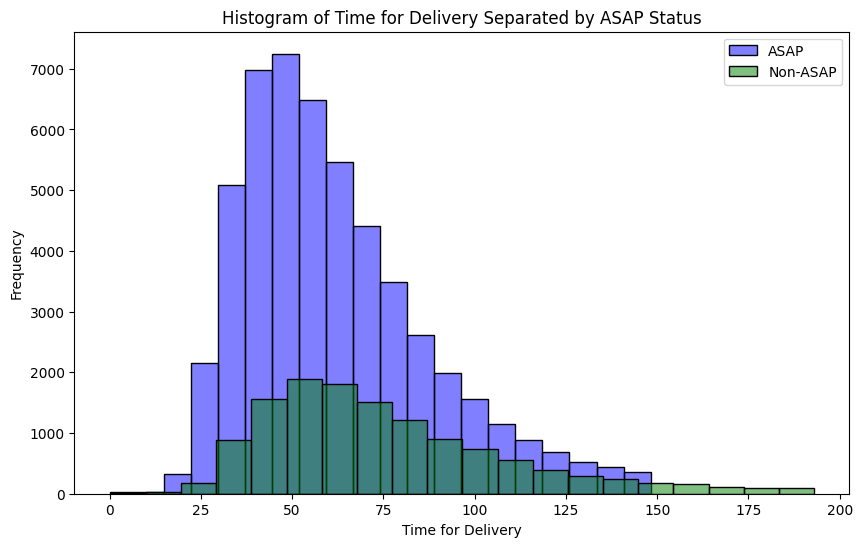

In [170]:
# Create combined histogram for ASAP and non-ASAP orders
plt.figure(figsize=(10, 6))  # Set the figure size

# Customize number of bins, color, transparency and label
sb.histplot(asap_orders_filtered['Time for Delivery'], bins=20, color='blue', alpha=0.5, label='ASAP')
sb.histplot(non_asap_orders_filtered['Time for Delivery'], bins=20, color='green', alpha=0.5, label='Non-ASAP')

# Customize label and title
plt.xlabel('Time for Delivery')
plt.ylabel('Frequency')
plt.title('Histogram of Time for Delivery Separated by ASAP Status')
plt.legend()

plt.show()

#### Histogram using percentage:
A histogram that includes the number of deliveries for both ASAP and Non-ASAP orders may not be ideal, especially considering the significantly higher volume of ASAP orders. A more effective approach is to use the percentage of deliveries that fall within specific time intervals for each type. This method gives us a more meaningful comparison between ASAP and Non-ASAP delivery times.

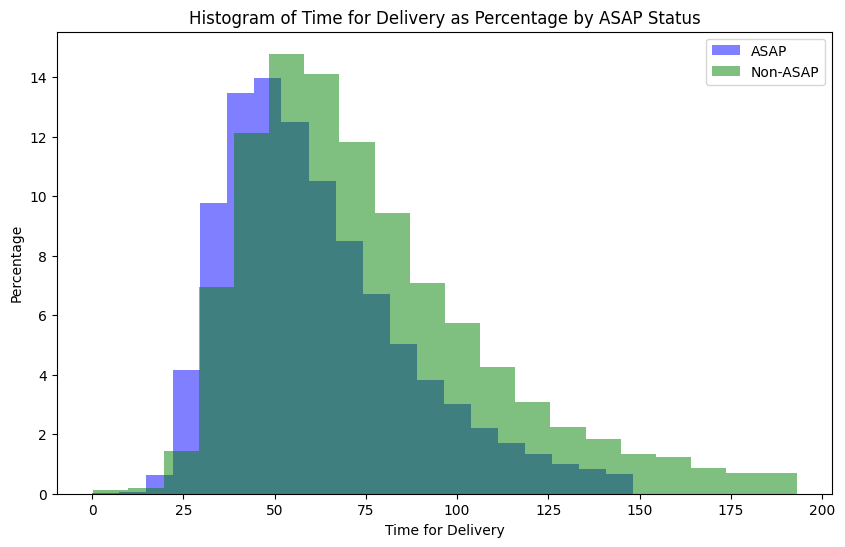

In [171]:
# Define total count of ASAP and Non ASAP
total_asap_count = len(asap_orders_filtered)
total_non_asap_count = len(non_asap_orders_filtered)

# Calculate percentages for ASAP and non-ASAP groups
asap_percentages = (asap_orders_filtered['Time for Delivery'].value_counts() / total_asap_count) * 100
non_asap_percentages = (non_asap_orders_filtered['Time for Delivery'].value_counts() / total_non_asap_count) * 100

# Plot histograms with percentages using Matplotlib
plt.figure(figsize=(10, 6))

# Customize weight, number of bins, color, transparency and labels
plt.hist(asap_percentages.index, weights=asap_percentages.values, bins=20, color='blue', alpha=0.5, label='ASAP')
plt.hist(non_asap_percentages.index, weights=non_asap_percentages.values, bins=20, color='green', alpha=0.5, label='Non-ASAP')

# Customize label and title
plt.xlabel('Time for Delivery')
plt.ylabel('Percentage')
plt.title('Histogram of Time for Delivery as Percentage by ASAP Status')

plt.legend()

plt.show()


## 5. Conclusion
Through this data analysis, we have gained valuable insights into various aspects of the dataset. We have uncovered sales trend, recognized top-performing restaurants and drivers, identified high-demand hours, and compared them against driver availability. These insights can be of great value for decision-makers, offering opportunities to enhance performance and customer satisfaction.